# -- The First Section is learned from Udemy course -- 

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [45]:
df = pd.read_csv('C:/Users/Naravith/Desktop/4thyear/Project - github/TensorFlow_FILES/DATA/fake_reg.csv')

In [46]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [47]:
X = df[['feature1','feature2']].values
print(X)

[[ 999.78755752  999.7660962 ]
 [ 998.86161491 1001.04240315]
 [1000.07026691  998.84401463]
 ...
 [1001.45164617  998.84760554]
 [1000.77102275  998.56285086]
 [ 999.2322436  1001.45140713]]


In [48]:
y = df['price'].values

# 1. Test - Train Split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
X_train.shape

(670, 2)

In [51]:
X_test.shape

(330, 2)

# 2. Scaling Data

#### Scale Features, Don't need to scale the label. 

In [52]:
scaler = MinMaxScaler()

In [53]:
# Calculate what's needed for the transformation (Train set only)
scaler.fit(X_train)

MinMaxScaler()

In [54]:
# Perform Transformation
X_train = scaler.transform(X_train)

In [55]:
X_test = scaler.transform(X_test)

In [56]:
X_train.max()  # Value is now between 0 - 1

1.0

# 3. Building and Compile a Model

model = Sequential([
    Dense(4,activation='relu'),
    Dense(2,activation='relu'),
    Dense(1)
])

or using

In [57]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))


In [58]:
model.compile(
    optimizer='rmsprop',
    loss='mse'
)

In [59]:
model.fit(x=X_train, y=y_train, epochs=250, verbose=1)

Train on 670 samples
Epoch 1/250
670/670 [==============================] - 0s 606us/sample - loss: 256590.4646
Epoch 2/250
670/670 [==============================] - 0s 30us/sample - loss: 256464.8577
Epoch 3/250
670/670 [==============================] - 0s 30us/sample - loss: 256331.1886
Epoch 4/250
670/670 [==============================] - 0s 30us/sample - loss: 256179.4133
Epoch 5/250
670/670 [==============================] - 0s 36us/sample - loss: 256004.3517
Epoch 6/250
670/670 [==============================] - 0s 42us/sample - loss: 255797.6671
Epoch 7/250
670/670 [==============================] - 0s 29us/sample - loss: 255561.0743
Epoch 8/250
670/670 [==============================] - 0s 34us/sample - loss: 255295.5174
Epoch 9/250
670/670 [==============================] - 0s 30us/sample - loss: 254999.6561
Epoch 10/250
670/670 [==============================] - 0s 33us/sample - loss: 254670.6944
Epoch 11/250
670/670 [==============================] - 0s 33us/sample - loss

670/670 [==============================] - 0s 25us/sample - loss: 3731.1044
Epoch 92/250
670/670 [==============================] - 0s 27us/sample - loss: 3106.1302
Epoch 93/250
670/670 [==============================] - 0s 27us/sample - loss: 2837.7109
Epoch 94/250
670/670 [==============================] - 0s 30us/sample - loss: 2758.4543
Epoch 95/250
670/670 [==============================] - 0s 27us/sample - loss: 2719.9677
Epoch 96/250
670/670 [==============================] - 0s 27us/sample - loss: 2687.1530
Epoch 97/250
670/670 [==============================] - 0s 30us/sample - loss: 2651.7294
Epoch 98/250
670/670 [==============================] - 0s 27us/sample - loss: 2611.7946
Epoch 99/250
670/670 [==============================] - 0s 27us/sample - loss: 2579.3335
Epoch 100/250
670/670 [==============================] - 0s 27us/sample - loss: 2550.4926
Epoch 101/250
670/670 [==============================] - 0s 30us/sample - loss: 2516.9372
Epoch 102/250
670/670 [=========

670/670 [==============================] - 0s 30us/sample - loss: 333.2748
Epoch 183/250
670/670 [==============================] - 0s 31us/sample - loss: 316.3919
Epoch 184/250
670/670 [==============================] - 0s 30us/sample - loss: 301.5593
Epoch 185/250
670/670 [==============================] - 0s 27us/sample - loss: 286.0341
Epoch 186/250
670/670 [==============================] - 0s 28us/sample - loss: 270.5986
Epoch 187/250
670/670 [==============================] - 0s 28us/sample - loss: 256.1523
Epoch 188/250
670/670 [==============================] - 0s 30us/sample - loss: 242.1710
Epoch 189/250
670/670 [==============================] - 0s 29us/sample - loss: 228.2600
Epoch 190/250
670/670 [==============================] - 0s 31us/sample - loss: 216.4259
Epoch 191/250
670/670 [==============================] - 0s 34us/sample - loss: 206.3287
Epoch 192/250
670/670 [==============================] - 0s 30us/sample - loss: 192.5225
Epoch 193/250
670/670 [============

<AxesSubplot:>

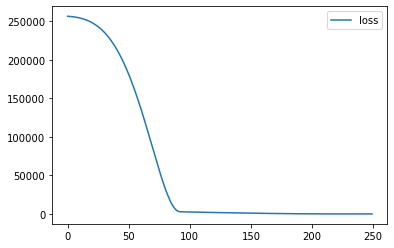

In [60]:
# Looking at Training history

loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

# 4. Evaluate Model

In [61]:
model.evaluate(X_test,y_test,verbose=0)

# Calculate the MSE

24.306211309721977

In [62]:
test_predictions = model.predict(X_test)

In [63]:
test_predictions

array([[405.50378],
       [623.6442 ],
       [592.2411 ],
       [572.38184],
       [366.8984 ],
       [579.3134 ],
       [515.2587 ],
       [459.2758 ],
       [549.41156],
       [447.69   ],
       [611.8952 ],
       [549.0399 ],
       [419.31076],
       [409.0934 ],
       [651.28235],
       [437.48383],
       [508.5748 ],
       [660.0595 ],
       [662.6865 ],
       [565.65216],
       [334.50226],
       [445.03125],
       [382.77036],
       [378.98038],
       [566.732  ],
       [610.72894],
       [532.5485 ],
       [428.05865],
       [655.56177],
       [414.27243],
       [442.81317],
       [485.302  ],
       [438.60846],
       [681.946  ],
       [424.93082],
       [417.9147 ],
       [502.0417 ],
       [550.61304],
       [509.93277],
       [395.6224 ],
       [618.6881 ],
       [416.8229 ],
       [604.5552 ],
       [446.11972],
       [502.15598],
       [581.7893 ],
       [669.04456],
       [490.55576],
       [318.81488],
       [485.60614],


In [64]:
# Numpy array -> Pandas Series
test_predictions = pd.Series(test_predictions.reshape(330,))
test_predictions

0      405.503784
1      623.644226
2      592.241089
3      572.381836
4      366.898407
          ...    
325    535.220032
326    433.537262
327    370.959656
328    499.207520
329    497.325134
Length: 330, dtype: float32

In [65]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [66]:
pred_df = pd.concat([pred_df,test_predictions], axis=1)

In [67]:
pred_df.columns = ['Test True Y','Model Predictions']
pred_df

,Test True Y,Model Predictions
0,402.296319,405.503784
1,624.156198,623.644226
2,582.455066,592.241089
3,578.588606,572.381836
4,371.224104,366.898407
...,...,...
325,535.543676,535.220032
326,425.843651,433.537262
327,368.920095,370.959656
328,505.631884,499.207520


<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

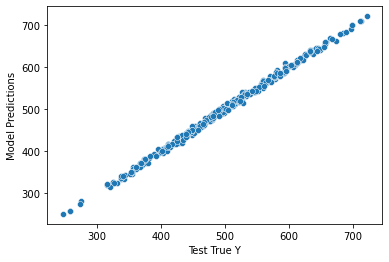

In [68]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [69]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

3.9519285701901143

In [70]:
df.describe()

# See that our MAE is around 4, mean price = 400 which means that
# Error of price prediction is just about 1% (4/400) -> Pretty Good

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


# 5. Predict on new set of data 

In [71]:
new_gem = [[998,1000]]

In [72]:
new_gem = scaler.transform(new_gem)

In [73]:
model.predict(new_gem)

array([[419.93842]], dtype=float32)

# 6. Save - Load a model

In [74]:
from tensorflow.keras.models import load_model

In [75]:
model.save('C:/Users/Naravith/Desktop/my_gem_model.h5')

In [76]:
later_model = load_model('C:/Users/Naravith/Desktop/my_gem_model.h5')

In [77]:
later_model.predict(new_gem)

array([[419.93842]], dtype=float32)

# -- The second section is from Keras website --

##### https://keras.io/guides/sequential_model/#what-to-do-once-you-have-a-model 

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### The Functional API 
###### Functional API is a way to create models that are more flexible than the tf.keras.Sequential API

###### "Keras also provides the functional API, a way to define complex models, such as multi-output models, directed acyclic graphs, or models with shared layers."

In [2]:
inputs = keras.Input(shape=(784,)) 
# The shape of the data is set as a 784-dimensional vector. 
# The batch size is always omitted since only the shape of each sample is specified

In [3]:
inputs.shape

TensorShape([None, 784])

In [4]:
dense = layers.Dense(64,activation="relu")
x = dense(inputs)

In [6]:
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)

# Output Layer
outputs = layers.Dense(10)(x)

In [7]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [9]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 60,970
Trainable params: 60,970
Non-trainable params: 0
___________________________________________________